In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

In [2]:
df = pd.read_csv('Vehical_data.csv')

In [3]:
df.head()

,Year,Make,Model,Condition,Price,Consumer_Rating,Consumer_Review_#,Exterior_Color,Interior_Color,Drivetrain,...,Stock_#,trip(distance_travelled),Comfort_Rating,Interior_Design_Rating,Performance_Rating,Value_For_Money_Rating,Exterior_Styling_Rating,Reliability_Rating,State,Seller_Type
0,2023,Toyota,Q8 RTL,New,"$46,370",4.8,9,Platinum White Pearl,Beige,All-wheel Drive,...,830164,10,5.0,4.8,4.8,4.2,5.0,5.0,CA,Dealer
1,2023,Toyota,XI-B Hybrid Sport,New,"$34,150",1.7,24,Platinum White Pearl,Black,FWD,...,6402953,-,5.0,3.0,4.0,4.0,5.0,5.0,CA,Dealer
2,2023,Toyota,XI-B Hybrid Sport,New,"$34,245",4.7,2869,Meteorite Gray Metallic,Black,Front-wheel Drive,...,PH704805,1,5.0,3.0,4.0,4.0,5.0,5.0,CA,Dealer
3,2022,Toyota,P1 TrailSport,New,"$46,500",5.0,12,Sonic Gray Pearl,Black,All-wheel Drive,...,5700429B,5,5.0,5.0,5.0,5.0,5.0,5.0,CA,Dealer
4,2023,Toyota,XI-B Hybrid Sport Touring,New,"$40,395",4.4,12,Crystal Black Pearl,Black,All-wheel Drive,...,5705954,5,5.0,3.0,4.0,4.0,5.0,5.0,CA,Dealer


In [4]:
# check the df structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      4999 non-null   int64  
 1   Make                      4999 non-null   object 
 2   Model                     4999 non-null   object 
 3   Condition                 4999 non-null   object 
 4   Price                     4999 non-null   object 
 5   Consumer_Rating           4999 non-null   float64
 6   Consumer_Review_#         4999 non-null   int64  
 7   Exterior_Color            4988 non-null   object 
 8   Interior_Color            4988 non-null   object 
 9   Drivetrain                4988 non-null   object 
 10  Miles per Gallon          3514 non-null   object 
 11  Fuel_Type                 4988 non-null   object 
 12  Transmission              4988 non-null   object 
 13  Engine                    4988 non-null   object 
 14  VIN     

In [5]:
# find number of rows and column
df.shape

(4999, 25)

In [6]:
# describe df numerical columns
df.describe()

,Year,Consumer_Rating,Consumer_Review_#,Comfort_Rating,Interior_Design_Rating,Performance_Rating,Value_For_Money_Rating,Exterior_Styling_Rating,Reliability_Rating
count,4999.000000,4999.000000,4999.000000,4447.00000,4447.000000,4447.000000,4447.000000,4447.000000,4447.000000
mean,2020.507702,4.569654,1288.366673,4.81754,4.706814,4.663931,4.580976,4.731954,4.866269
std,3.711361,0.542453,1969.998095,0.25903,0.476941,0.351680,0.372107,0.313093,0.190886
min,1981.000000,1.200000,0.000000,3.80000,3.000000,3.600000,3.600000,3.900000,4.000000
25%,2019.000000,4.400000,126.000000,4.70000,4.700000,4.500000,4.200000,4.600000,4.800000
50%,2022.000000,4.700000,697.000000,4.90000,4.800000,4.800000,4.600000,4.800000,5.000000
75%,2023.000000,4.900000,1695.500000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000
max,2023.000000,5.000000,29258.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000


In [7]:
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

Make
['Toyota']
Model
['Q8 RTL' 'XI-B Hybrid Sport' 'P1 TrailSport' 'XI-B Hybrid Sport Touring'
 'Oddie EX-L' 'P1 Elite' 'P1 Special Edition' 'XI-B EX-L' 'P1 Sport'
 'Q8 RTL-E' 'GoPlus Elite' 'FA_3 Sport 1.5T' 'Excite Sport' 'F1 Sport'
 'FA_3 Sport 2.0T' 'FA_3 EX' 'GoPlus TrailSport' 'P1 EX-L' 'XI-B EX'
 'Oddie Sport' 'GoPlus EX-L' 'XI-B Touring' 'P1 Touring 8-Passenger'
 'FA_3 Hybrid Sport' 'Q8 Black Edition' 'FA_3 Sport SE' 'Oddie Elite'
 'P1 Touring 7-Passenger' 'Excite LX' 'Excite EX-L' 'Oddie Touring'
 'F1 Touring' 'P1 Black Edition' 'FA_3 Touring' 'F1 Si Base'
 'FA_3 Hybrid Sport-L' 'P1 EX-L 7-Passenger' 'FA_3 Hybrid Touring'
 'P1 EX-L 8-Passenger' 'FA_3 Hybrid Base' 'FA_3 EX-L 1.5T' 'F1 EX-L'
 'P1 Touring' 'F1 EX' 'Excite EX' 'F1 Sport Touring' 'FA_3 Sport'
 'FA_3 LX' 'XI-B LX' 'F1 Type R Touring' 'F1 LX' 'FA_3 EX-L'
 'FA_3 Hybrid EX-L' 'FA_3 LX 1.5T' 'GoPlus Sport' 'A3 Touring'
 'P1 EX-L w/ Navigation' 'Excite Touring' 'XI-B Hybrid EX-L' 'Y1 Base'
 'Q8 RTL-T' 'Port Plug-In Hybr

### Exploratory Data Analysis
* Find Unwanted Columns
* Explore the Categorical Features
* Find Categorical Feature Distribution
* Explore the Numerical Features
* Find Discrete Numerical Features
* Find Continous Numerical Features
* Distribution of Continous Numerical Features
* Find Outliers in numerical features
* Explore the Correlation between numerical features
* Find Pair Plot

In [8]:
# find missing values
features_na = [features for features in df.columns if df[features].isnull().sum() > 0]
for feature in features_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')

Exterior_Color 0.0022  % missing values
Interior_Color 0.0022  % missing values
Drivetrain 0.0022  % missing values
Miles per Gallon 0.2971  % missing values
Fuel_Type 0.0022  % missing values
Transmission 0.0022  % missing values
Engine 0.0022  % missing values
VIN 0.003  % missing values
Stock_# 0.0022  % missing values
trip(distance_travelled) 0.0022  % missing values
Comfort_Rating 0.1104  % missing values
Interior_Design_Rating 0.1104  % missing values
Performance_Rating 0.1104  % missing values
Value_For_Money_Rating 0.1104  % missing values
Exterior_Styling_Rating 0.1104  % missing values
Reliability_Rating 0.1104  % missing values
State 0.0146  % missing values
Seller_Type 0.0146  % missing values


**Find Unwanted Columns**
- Make column has only one category. Hence can be removed from the dataset

In [9]:
df.drop(columns = ['Make'], inplace=True)

**Explore the Categorical Features**

In [10]:
categorical_features=[feature for feature in df.columns if (df[feature].dtypes=='O')]
categorical_features

['Model',
 'Condition',
 'Price',
 'Exterior_Color',
 'Interior_Color',
 'Drivetrain',
 'Miles per Gallon',
 'Fuel_Type',
 'Transmission',
 'Engine',
 'VIN',
 'Stock_#',
 'trip(distance_travelled)',
 'State',
 'Seller_Type']

**Converting Price, trip(distance_travelled) and Miles per Gallon to numerical Features**
- Remove symbols from price 
- Convert trip to numeric value
- Miles per Gallon has a range of Value. Hence need to be converted to two columns of low and high values

In [11]:
df['Price'] = pd.to_numeric(df['Price'].str.replace('[\$,]', '', regex=True), errors='coerce')

In [12]:
df['trip(distance_travelled)'] = pd.to_numeric(df['trip(distance_travelled)'], errors='coerce')

In [13]:
def extract_low_and_high(value):
    if pd.notnull(value):
        split_values = value.replace('_to_', '_').split('_')
        start, end = map(float, split_values[0:2])
        return pd.Series({'Low': start, 'High': end})
    else:
        return pd.Series({'Low': None, 'High': None})

# Apply the extraction function to the "Miles per Gallon" column
df[['Low_MPG', 'High_MPG']] = df['Miles per Gallon'].apply(extract_low_and_high)

In [14]:
col = df.columns.to_list()

In [15]:
df[col[:10]].head()

,Year,Model,Condition,Price,Consumer_Rating,Consumer_Review_#,Exterior_Color,Interior_Color,Drivetrain,Miles per Gallon
0,2023,Q8 RTL,New,46370.0,4.8,9,Platinum White Pearl,Beige,All-wheel Drive,NaN
1,2023,XI-B Hybrid Sport,New,34150.0,1.7,24,Platinum White Pearl,Black,FWD,NaN
2,2023,XI-B Hybrid Sport,New,34245.0,4.7,2869,Meteorite Gray Metallic,Black,Front-wheel Drive,NaN
3,2022,P1 TrailSport,New,46500.0,5.0,12,Sonic Gray Pearl,Black,All-wheel Drive,19_to_25
4,2023,XI-B Hybrid Sport Touring,New,40395.0,4.4,12,Crystal Black Pearl,Black,All-wheel Drive,NaN


In [16]:
df[col[10:]].head()

,Fuel_Type,Transmission,Engine,VIN,Stock_#,trip(distance_travelled),Comfort_Rating,Interior_Design_Rating,Performance_Rating,Value_For_Money_Rating,Exterior_Styling_Rating,Reliability_Rating,State,Seller_Type,Low_MPG,High_MPG
0,Gasoline,Automatic,3.5L V6 24V GDI SOHC,STTM5FPYK3F58PB011817,830164,10.0,5.0,4.8,4.8,4.2,5.0,5.0,CA,Dealer,NaN,NaN
1,Hybrid,Automatic CVT,2.0L I4 16V GDI DOHC Hybrid,STTM2HKRS5H5XPH702953,6402953,NaN,5.0,3.0,4.0,4.0,5.0,5.0,CA,Dealer,NaN,NaN
2,Hybrid,Automatic CVT,2.0L I4 16V GDI DOHC Hybrid,STTM2HKRS5H55PH704805,PH704805,1.0,5.0,3.0,4.0,4.0,5.0,5.0,CA,Dealer,NaN,NaN
3,Gasoline,9-Speed Automatic,3.5L V6 24V GDI SOHC,STTM5FNYF6H82NB100429,5700429B,5.0,5.0,5.0,5.0,5.0,5.0,5.0,CA,Dealer,19.0,25.0
4,Hybrid,Automatic CVT,2.0L I4 16V GDI DOHC Hybrid,STTM2HKRS6H90PH805954,5705954,5.0,5.0,3.0,4.0,4.0,5.0,5.0,CA,Dealer,NaN,NaN


- Columns VIN(Vehicle Identification Number) and Stock_# have unique values for every column. Hence they are also dropped

In [17]:
df.drop(columns=['Miles per Gallon', 'VIN', 'Stock_#'], inplace = True)

In [18]:
categorical_features=[feature for feature in df.columns if (df[feature].dtypes=='O')]
categorical_features

['Model',
 'Condition',
 'Exterior_Color',
 'Interior_Color',
 'Drivetrain',
 'Fuel_Type',
 'Transmission',
 'Engine',
 'State',
 'Seller_Type']

In [19]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is Model and number of categories are 146
The feature is Condition and number of categories are 3
The feature is Exterior_Color and number of categories are 173
The feature is Interior_Color and number of categories are 63
The feature is Drivetrain and number of categories are 8
The feature is Fuel_Type and number of categories are 8
The feature is Transmission and number of categories are 59
The feature is Engine and number of categories are 76
The feature is State and number of categories are 54
The feature is Seller_Type and number of categories are 3


**Take away**
- Features: Model, Exterior_color, Interior_color, Transmission, Engine and state have many categorical values

In [20]:
high_categorical_features = ['Model', 'Exterior_Color', 'Interior_Color', 'Transmission', 'Engine', 'State']
low_categorical_features = ['Condition', 'Drivetrain', 'Fuel_Type', 'Seller_Type']

**Categorical Feature Distribution**

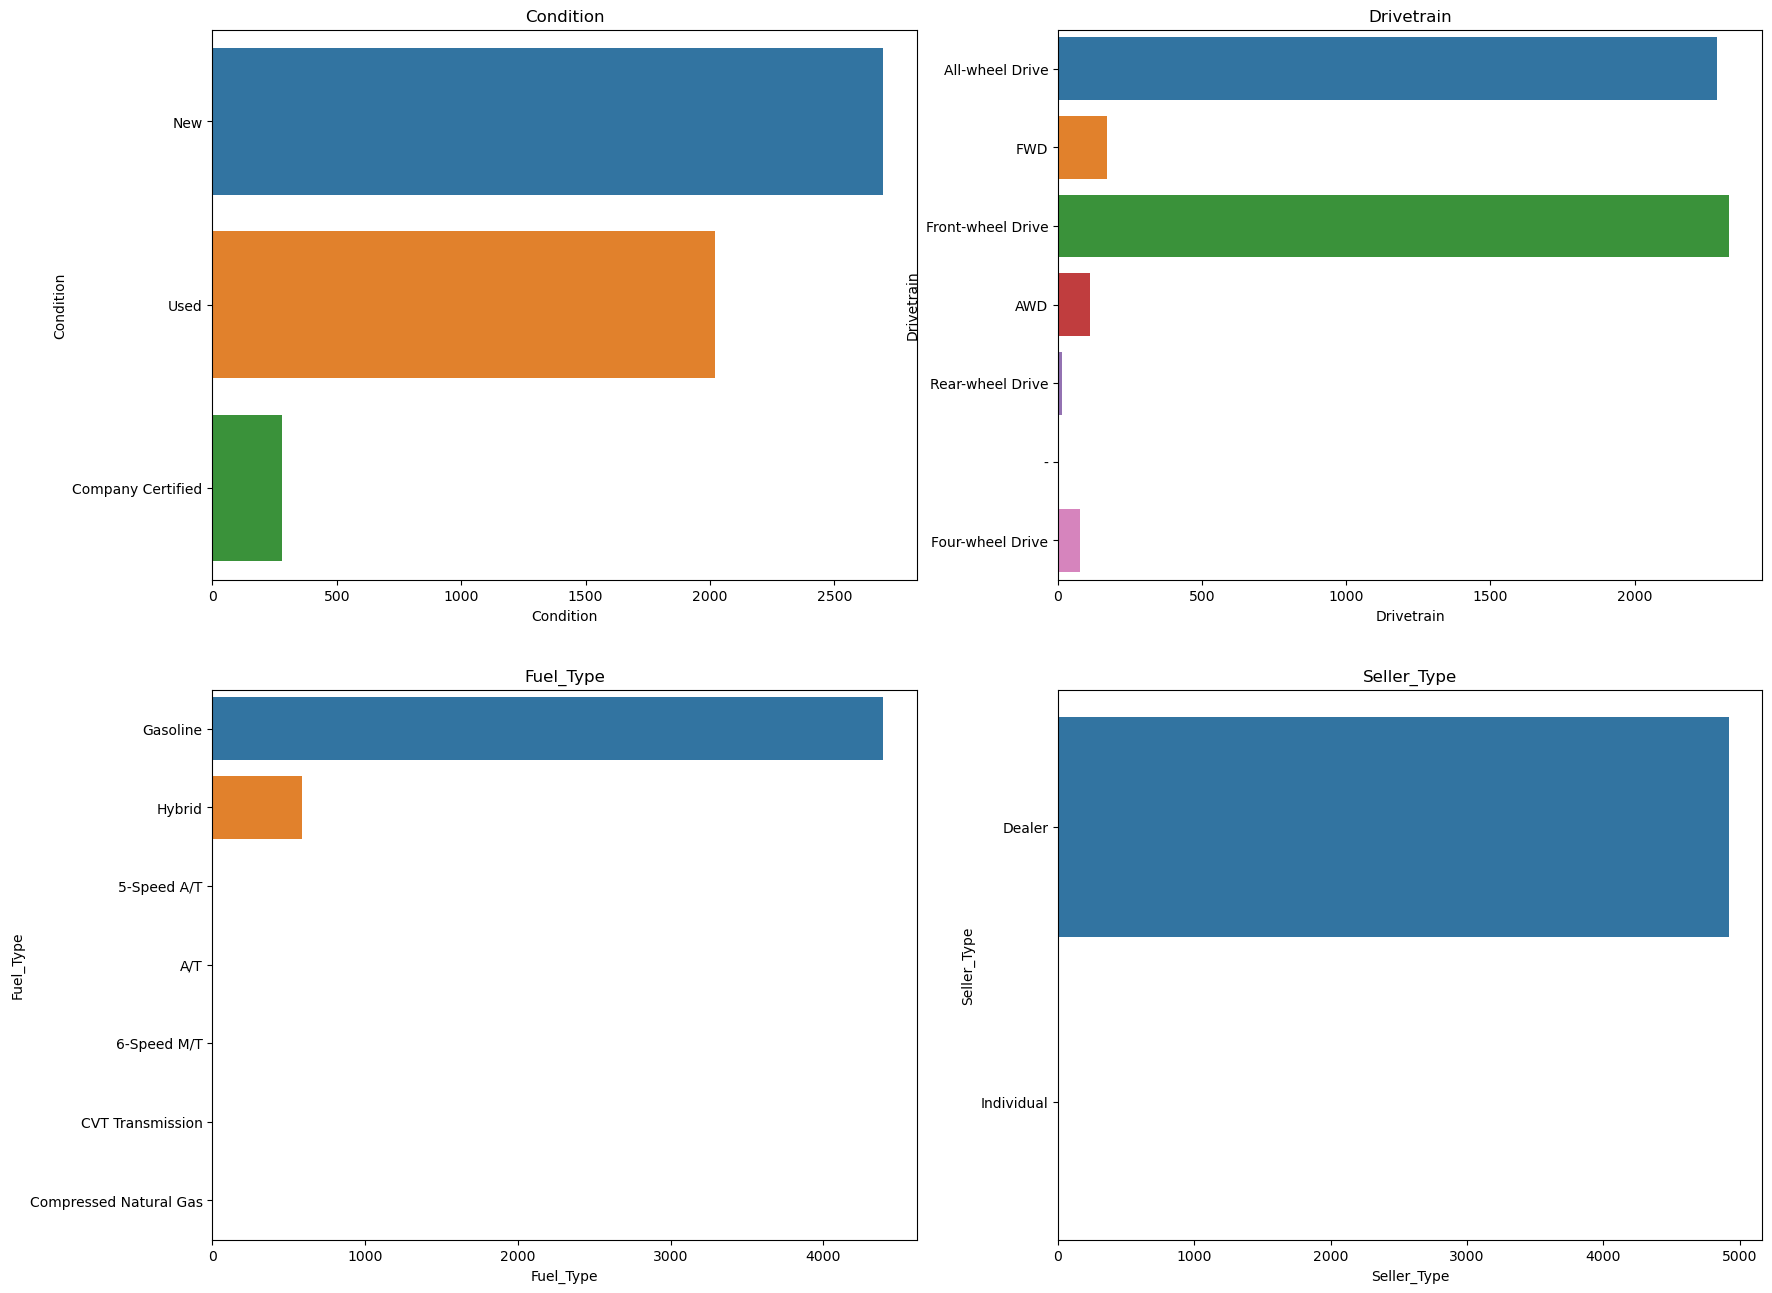

In [21]:
#check count based on categorical features
plt.figure(figsize=(20,50), facecolor='white')
plotnumber =1
for categorical_feature in low_categorical_features:
    ax = plt.subplot(6,2,plotnumber)
    sns.countplot(y=categorical_feature,data=df)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

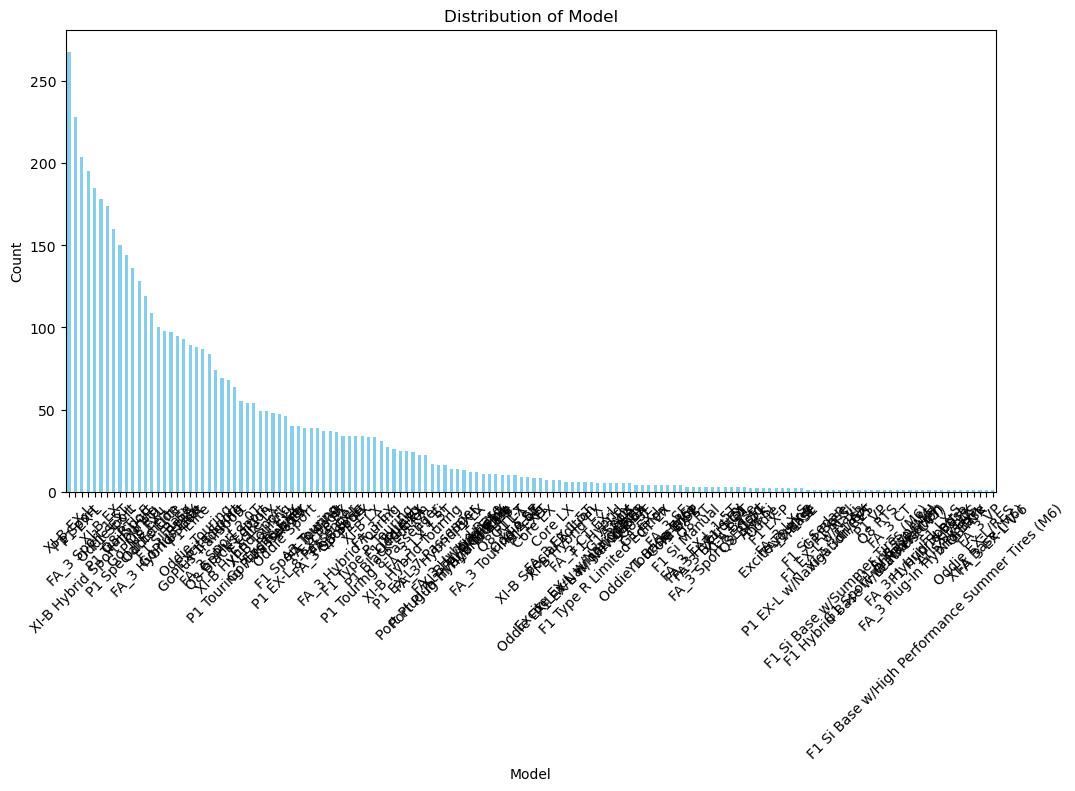

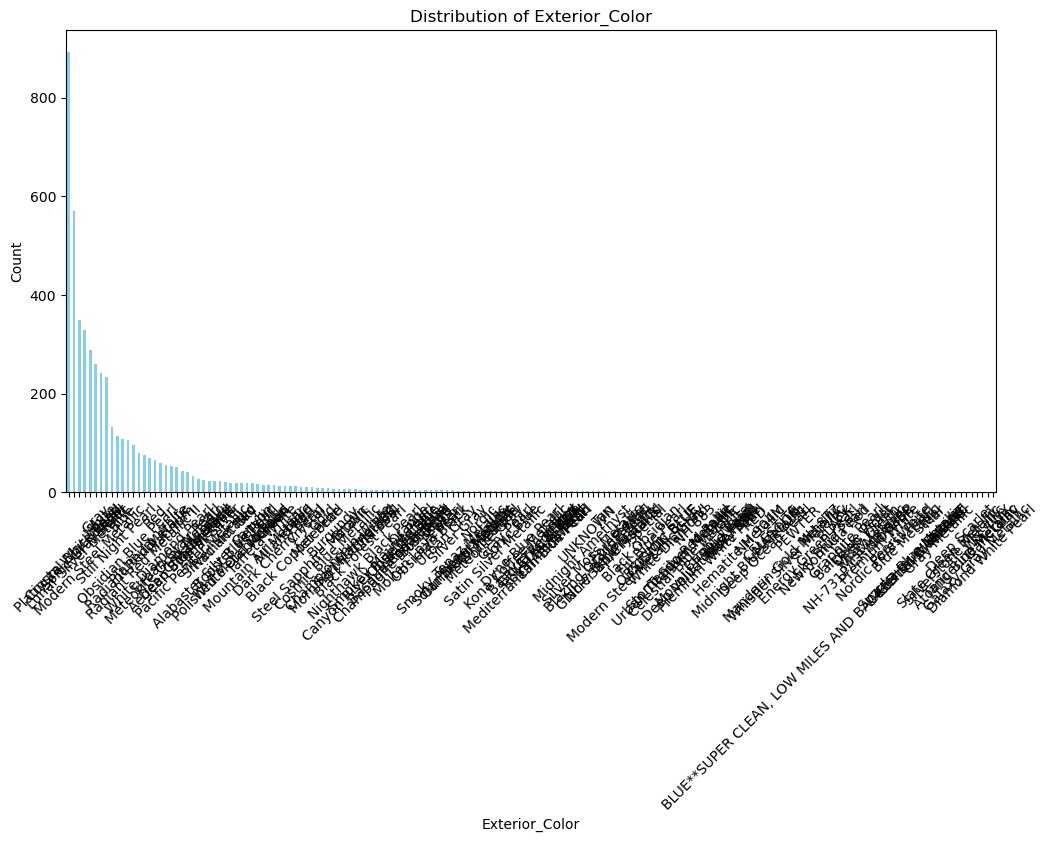

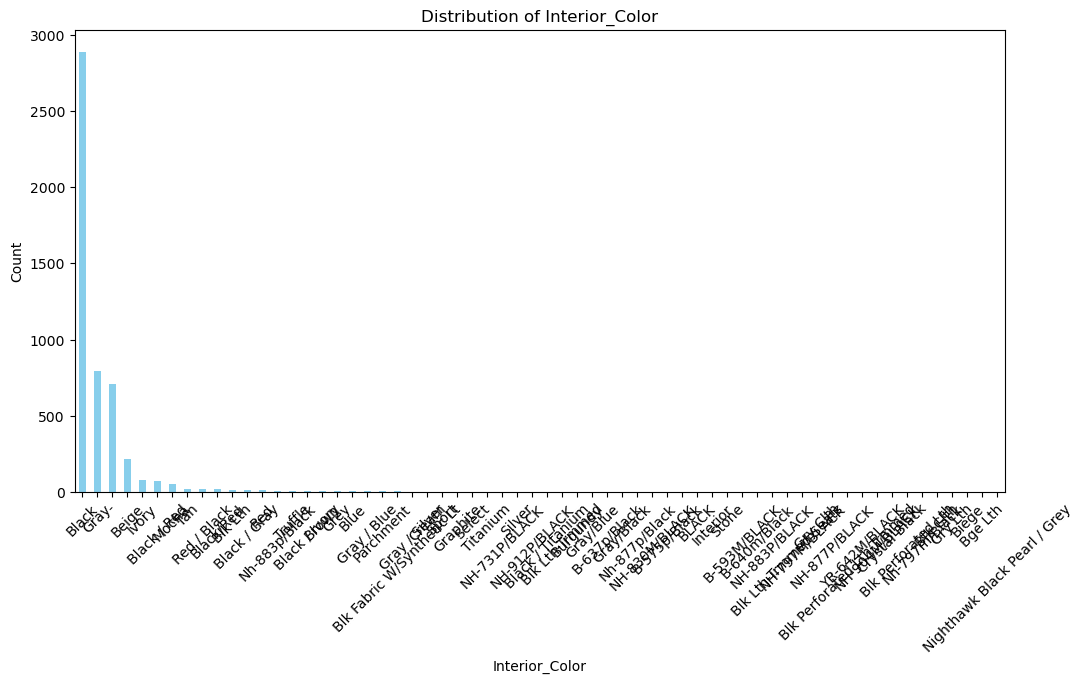

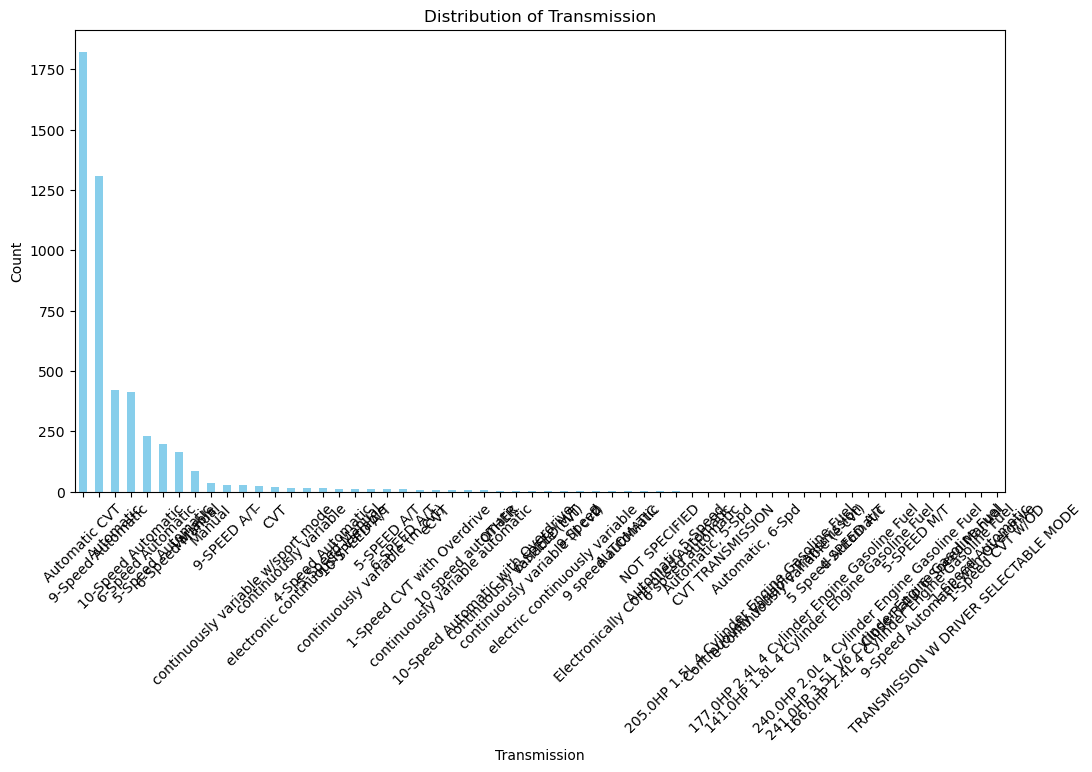

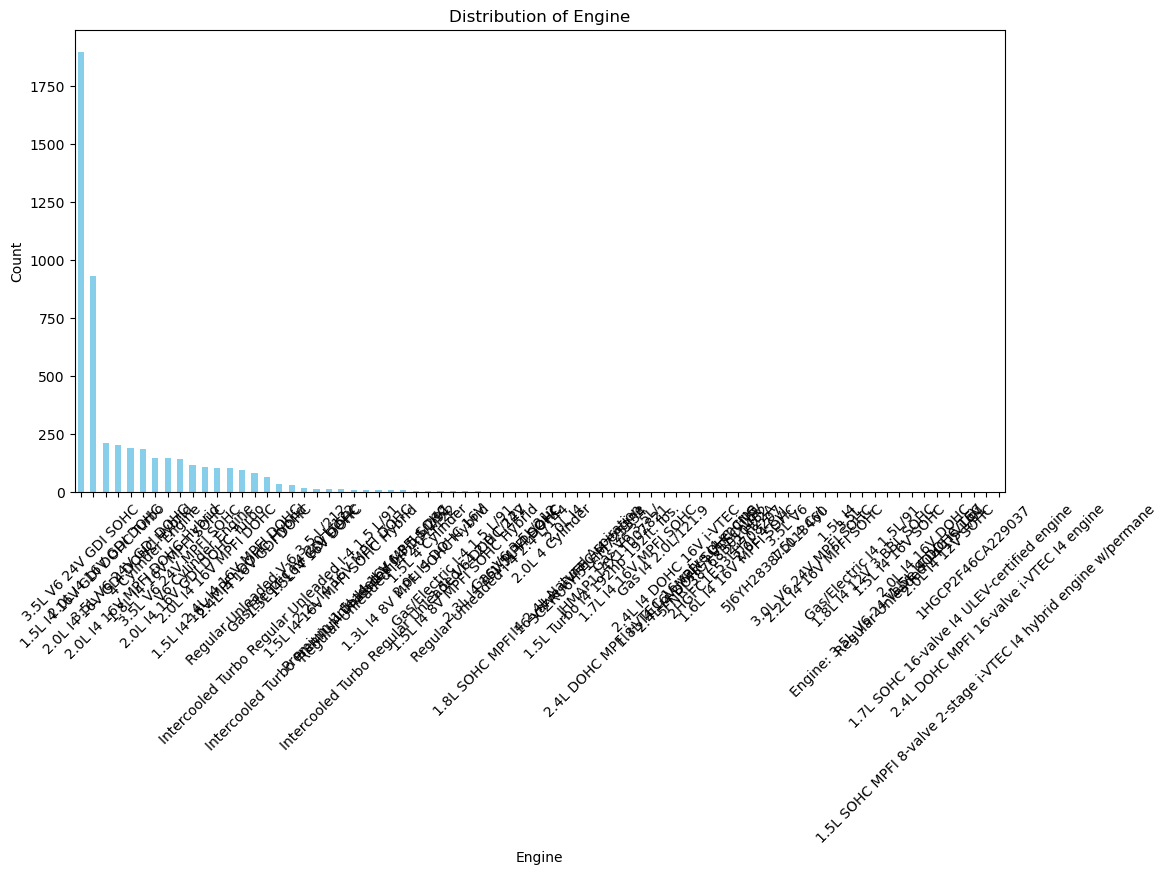

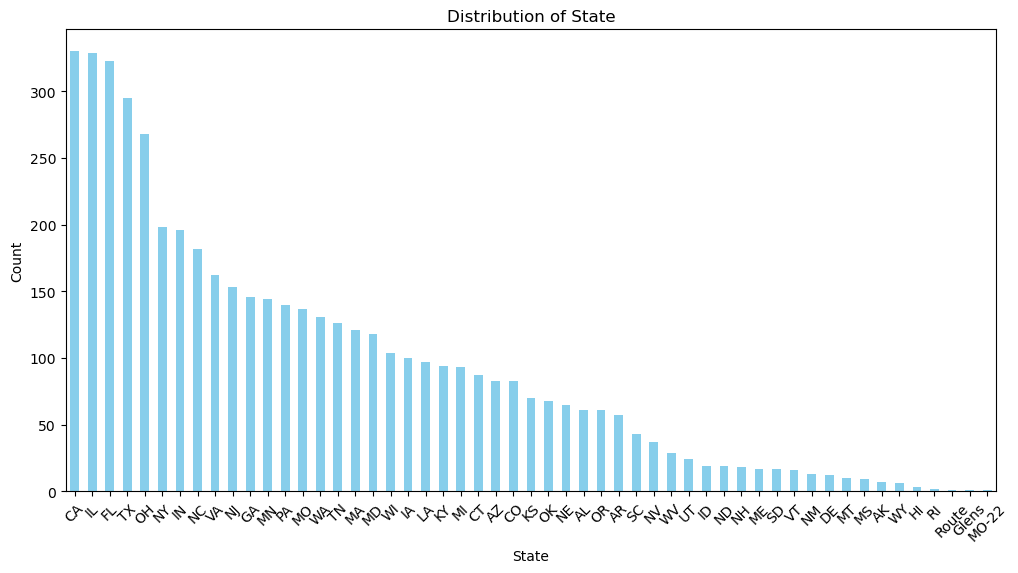

In [22]:
# Plotting each categorical feature
for feature in high_categorical_features:
    plt.figure(figsize=(12, 6))
    df[feature].value_counts().plot(kind='bar', color='skyblue')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45)
    plt.show()

**Take away**
- seller type mostly consists of dealers and very few individual sellers
- Exterior_Color, Interior_Color, Transmission and Engine has many categorical values which are negligible in number and hence these can be grouped as others

In [23]:
def grouping_others(df, feature, threshold):
    # Get the counts of each category
    category_counts = df[feature].value_counts()

    # Get the rows below the threshold
    rows_to_replace = category_counts[category_counts < threshold].index

    # Replace these colors with 'Others'
    df[feature].replace(rows_to_replace, 'Others', inplace=True)
    
    return df

In [24]:
df = grouping_others(df, 'Model', 15)
df['Model'].value_counts()

Others                         353
XI-B EX-L                      268
P1 Sport                       228
P1 EX-L                        204
FA_3 Sport 1.5T                195
                              ... 
FA_3 LX 1.5T                    22
P1 EX-L 7-Passenger             22
F1 Si                           17
FA_3 Hybrid EX-L                16
Port Plug-In Hybrid Touring     16
Name: Model, Length: 61, dtype: int64

In [25]:
df = grouping_others(df, 'Exterior_Color', 30)
df['Exterior_Color'].value_counts()

Platinum White Pearl       892
Others                     645
Crystal Black Pearl        570
Lunar Silver Metallic      350
Sonic Gray Pearl           329
Modern Steel Metallic      288
Gray                       259
White                      242
Black                      233
Silver                     132
Still Night Pearl          113
Blue                       107
Obsidian Blue Pearl        106
-                           96
Radiant Red Metallic        79
Radiant Red Metallic II     75
Platinum White              69
Red                         65
White Diamond Pearl         60
Meteorite Gray Metallic     56
Platinum                    53
Urban Gray Pearl            52
Aegean Blue Metallic        43
Deep Scarlet Pearl          41
Pacific Pewter Metallic     33
Name: Exterior_Color, dtype: int64

In [26]:
df = grouping_others(df, 'Interior_Color', 20)
df['Interior_Color'].value_counts()

Black          2889
Gray            795
-               710
Beige           216
Others          176
Ivory            79
Black / Red      72
Mocha            51
Name: Interior_Color, dtype: int64

In [27]:
df = grouping_others(df, 'Transmission', 40)
df['Transmission'].value_counts()

Automatic CVT         1823
9-Speed Automatic     1309
Automatic              420
10-Speed Automatic     412
Others                 344
6-Speed Automatic      231
5-Speed Automatic      198
6-Speed Manual         164
Variable                87
Name: Transmission, dtype: int64

In [28]:
df = grouping_others(df, 'Engine', 100)
df['Engine'].value_counts()

3.5L V6 24V GDI SOHC            1898
1.5L I4 16V GDI DOHC Turbo       931
Others                           495
2.0L I4 16V GDI DOHC             210
2.0L I4 16V GDI DOHC Hybrid      205
3.5L V6 24V GDI DOHC             190
2.0L I4 16V MPFI DOHC Hybrid     187
4 Cylinder Engine                148
1.8L I4 16V MPFI SOHC            147
3.5L V6 24V MPFI SOHC            142
2.0L I4 16V GDI DOHC Turbo       118
V6 Cylinder Engine               110
2.0L I4 16V MPFI DOHC            104
1.5L I4 16V MPFI DOHC Hybrid     103
Name: Engine, dtype: int64

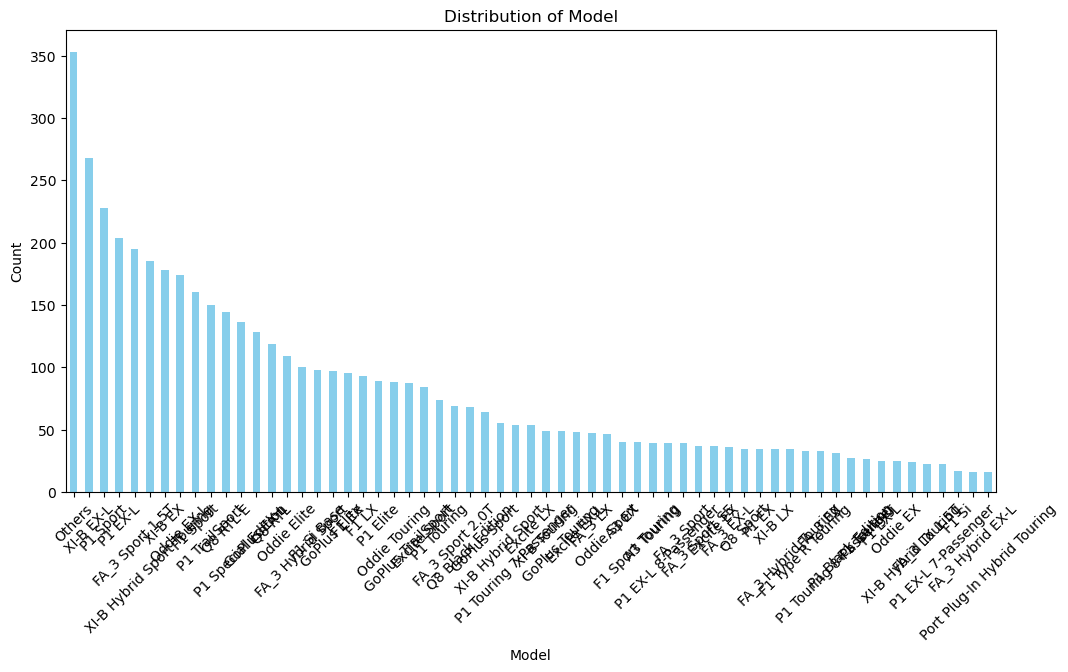

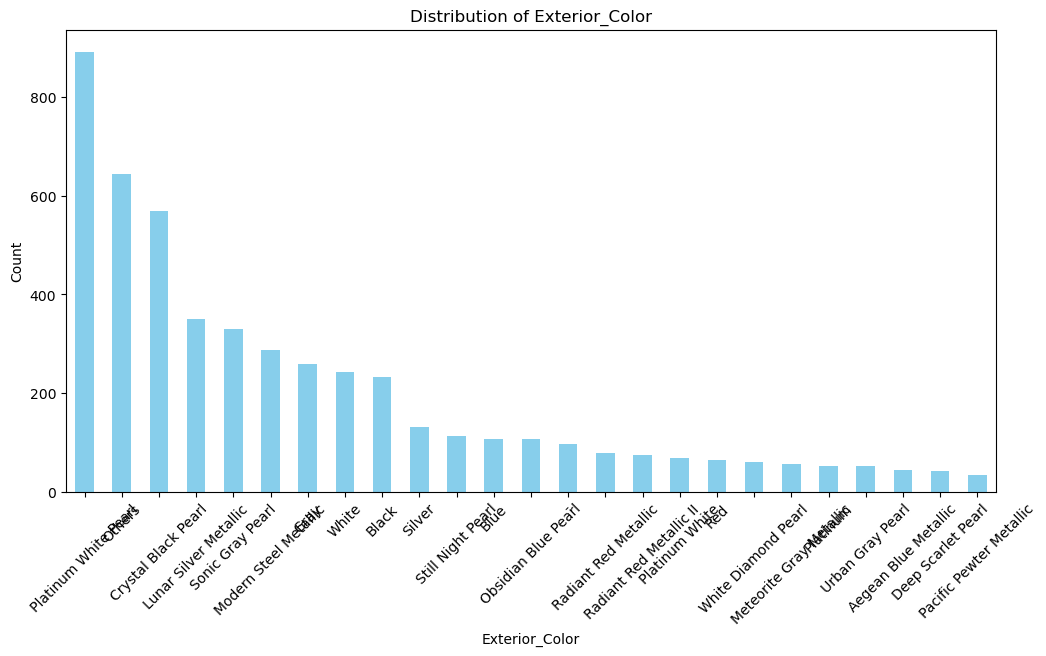

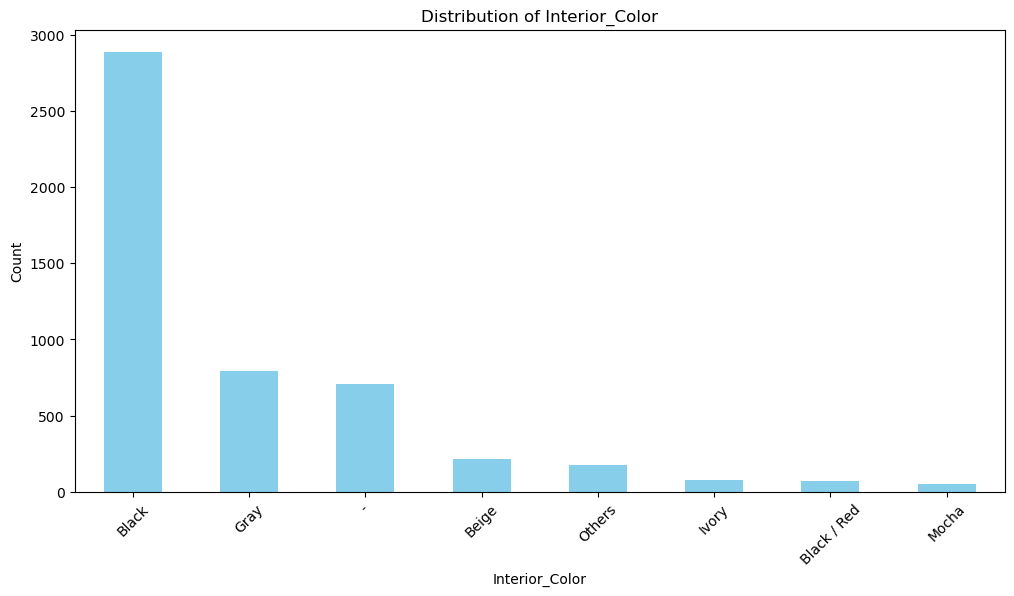

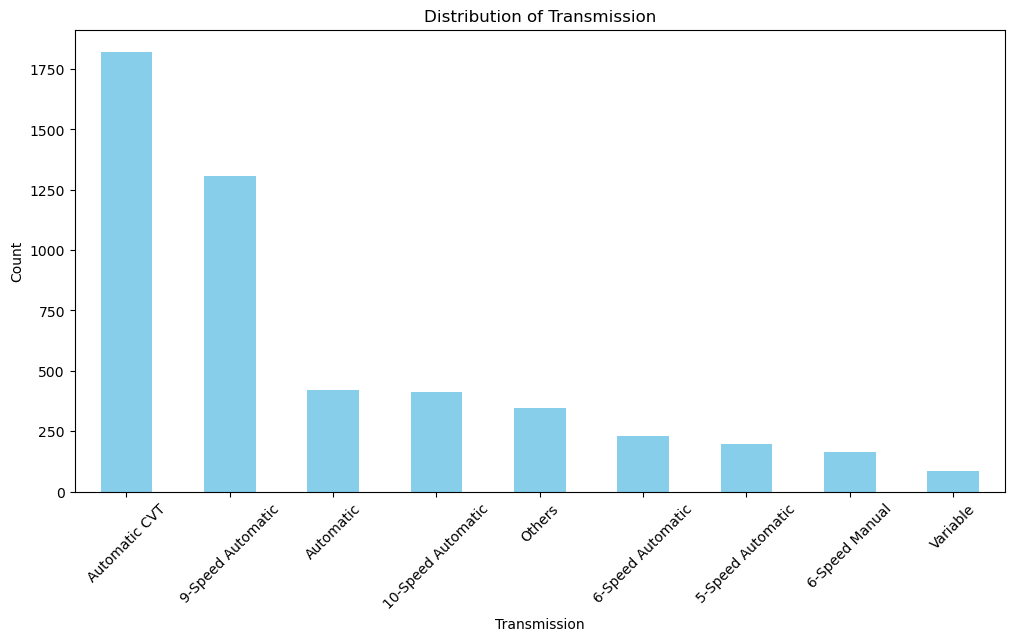

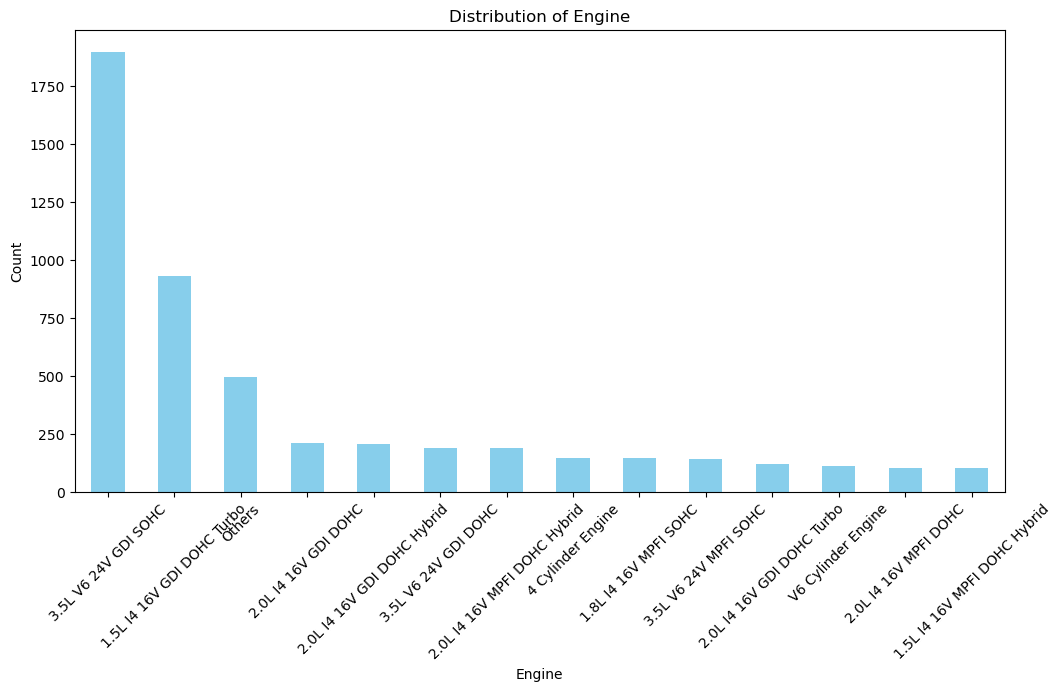

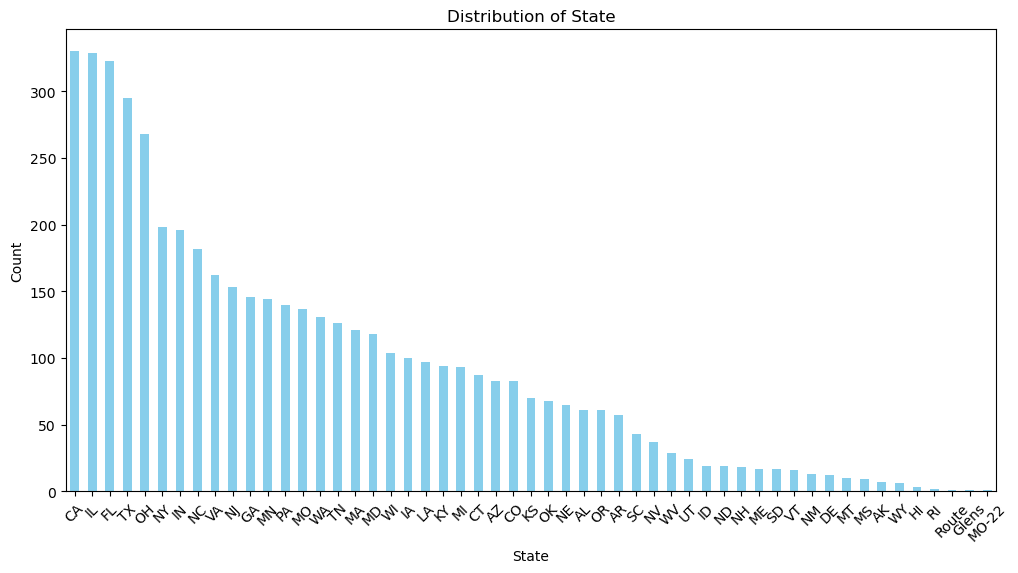

In [29]:
# Plotting each categorical feature
for feature in high_categorical_features:
    plt.figure(figsize=(12, 6))
    df[feature].value_counts().plot(kind='bar', color='skyblue')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45)
    plt.show()

**Explore Numerical Features**

In [30]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if (df[feature].dtypes != 'O')]
print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  13


,Year,Price,Consumer_Rating,Consumer_Review_#,trip(distance_travelled),Comfort_Rating,Interior_Design_Rating,Performance_Rating,Value_For_Money_Rating,Exterior_Styling_Rating,Reliability_Rating,Low_MPG,High_MPG
0,2023,46370.0,4.8,9,10.0,5.0,4.8,4.8,4.2,5.0,5.0,NaN,NaN
1,2023,34150.0,1.7,24,NaN,5.0,3.0,4.0,4.0,5.0,5.0,NaN,NaN
2,2023,34245.0,4.7,2869,1.0,5.0,3.0,4.0,4.0,5.0,5.0,NaN,NaN
3,2022,46500.0,5.0,12,5.0,5.0,5.0,5.0,5.0,5.0,5.0,19.0,25.0
4,2023,40395.0,4.4,12,5.0,5.0,3.0,4.0,4.0,5.0,5.0,NaN,NaN


**Discrete Numerical Features**

In [31]:
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 6


**Continuous Numerical Features**

In [32]:
continuous_features=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_features)))

Continuous feature Count 7


In [1]:
#plot a univariate distribution of continues observations
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for continuous_feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.histplot(df[continuous_feature],grid =true)
    plt.xlabel(continuous_feature)
    plotnumber+=1
plt.show()

NameError: name 'plt' is not defined

**Outliers in Numerical Features**

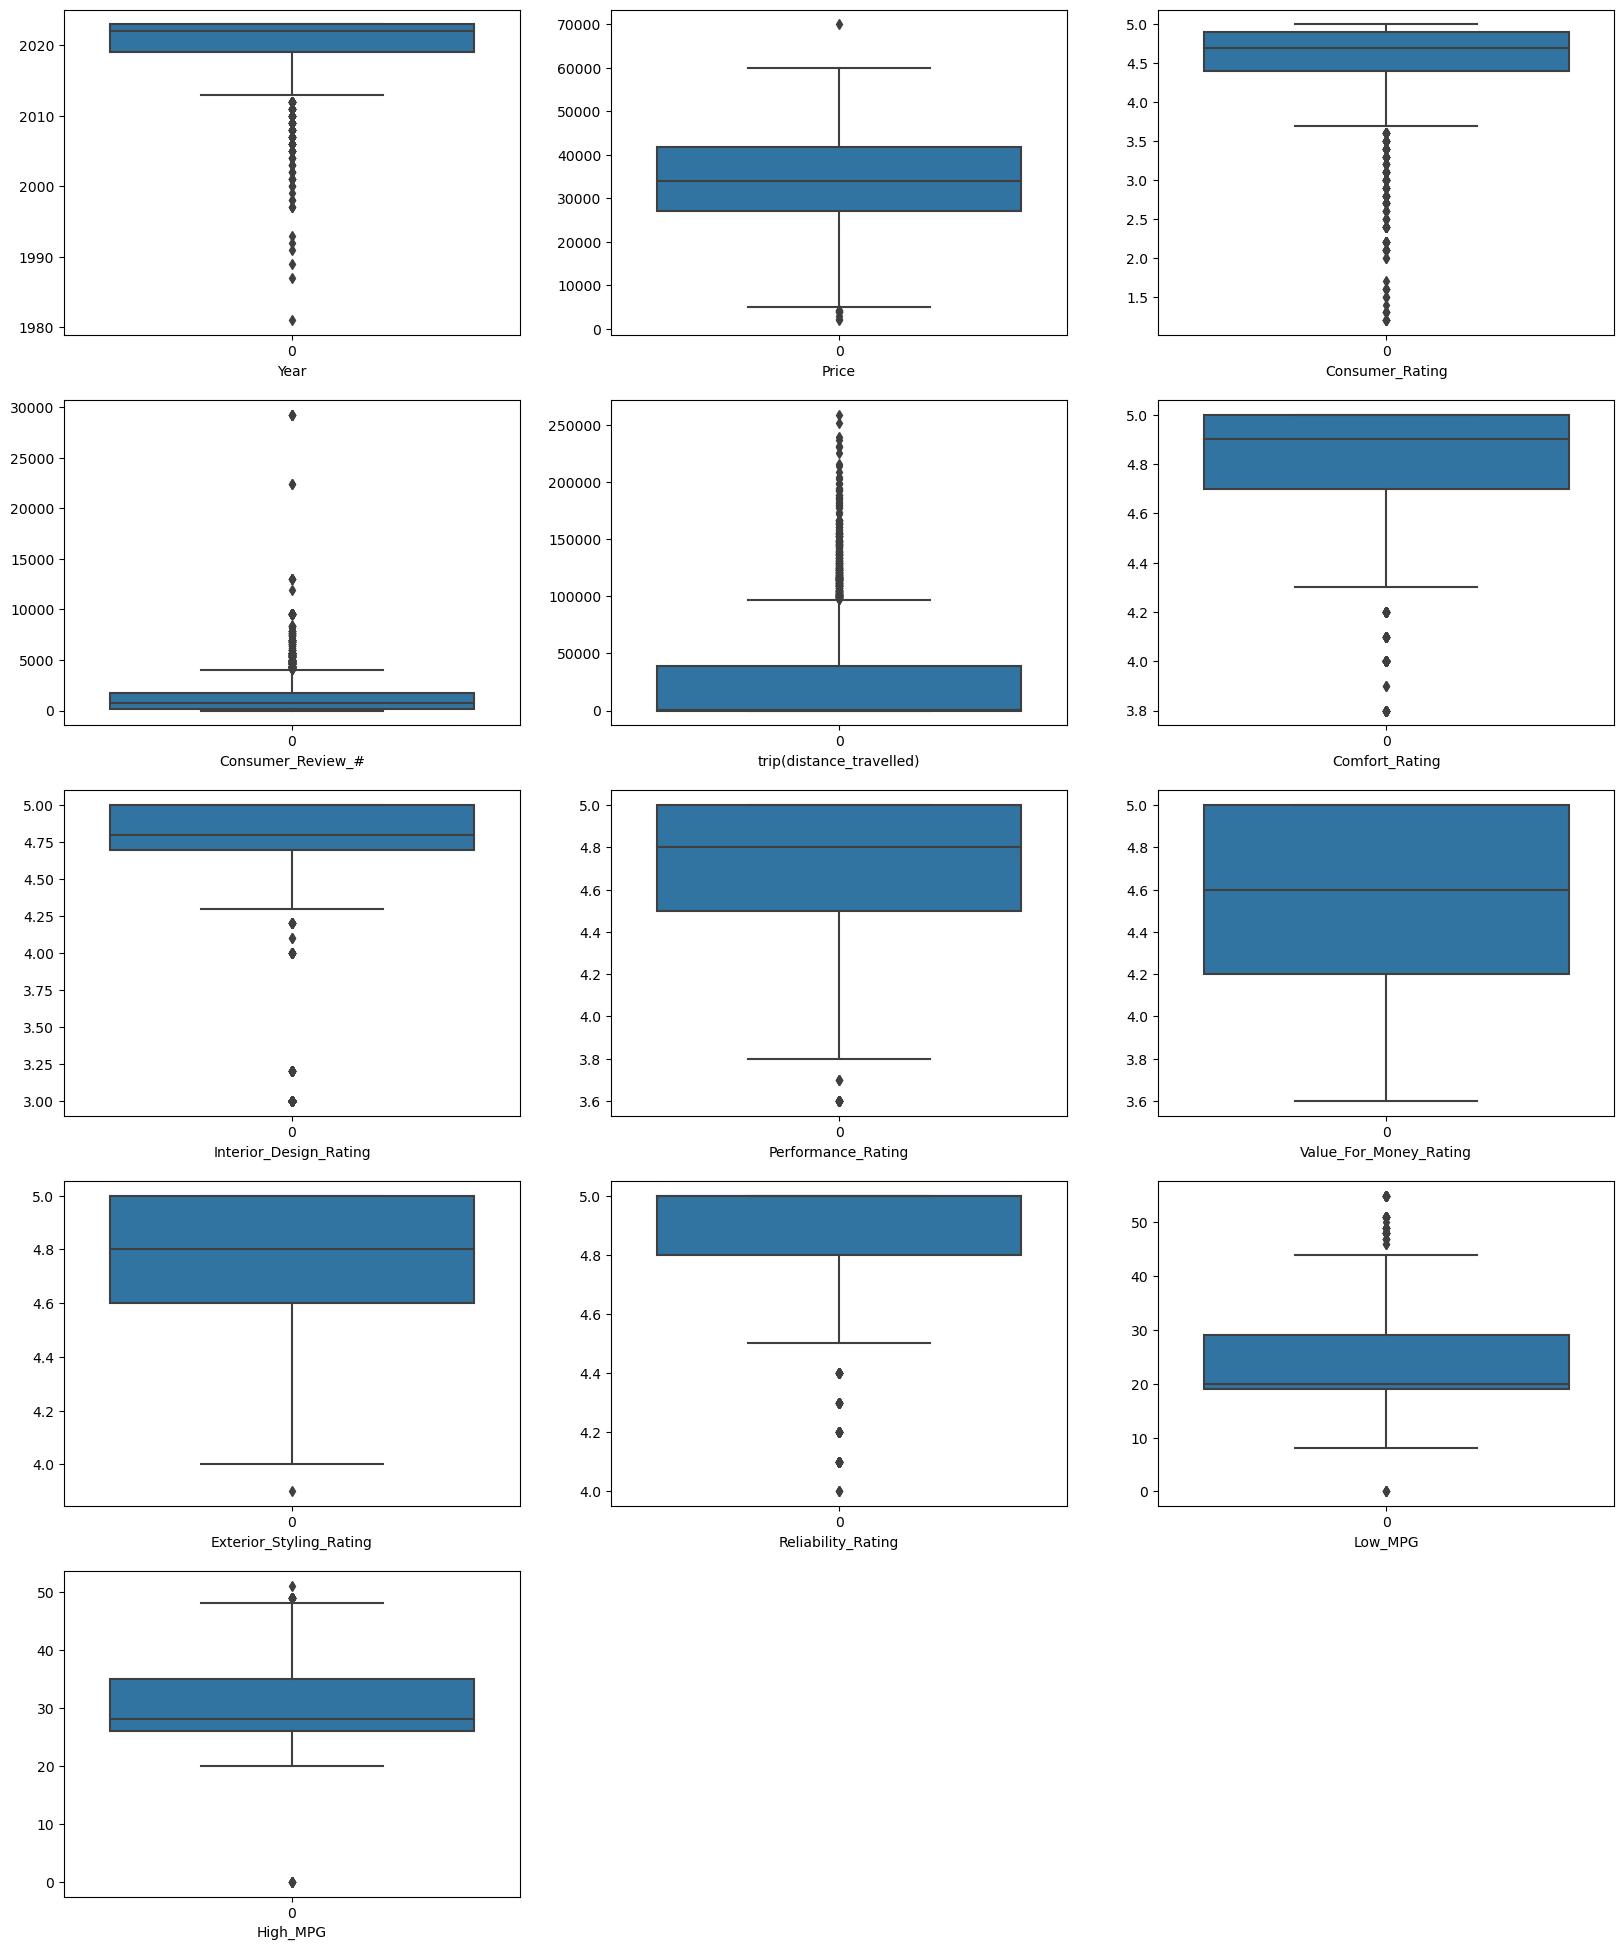

In [34]:
#boxplot on numerical features to find outliers
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(df[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

<Axes: >

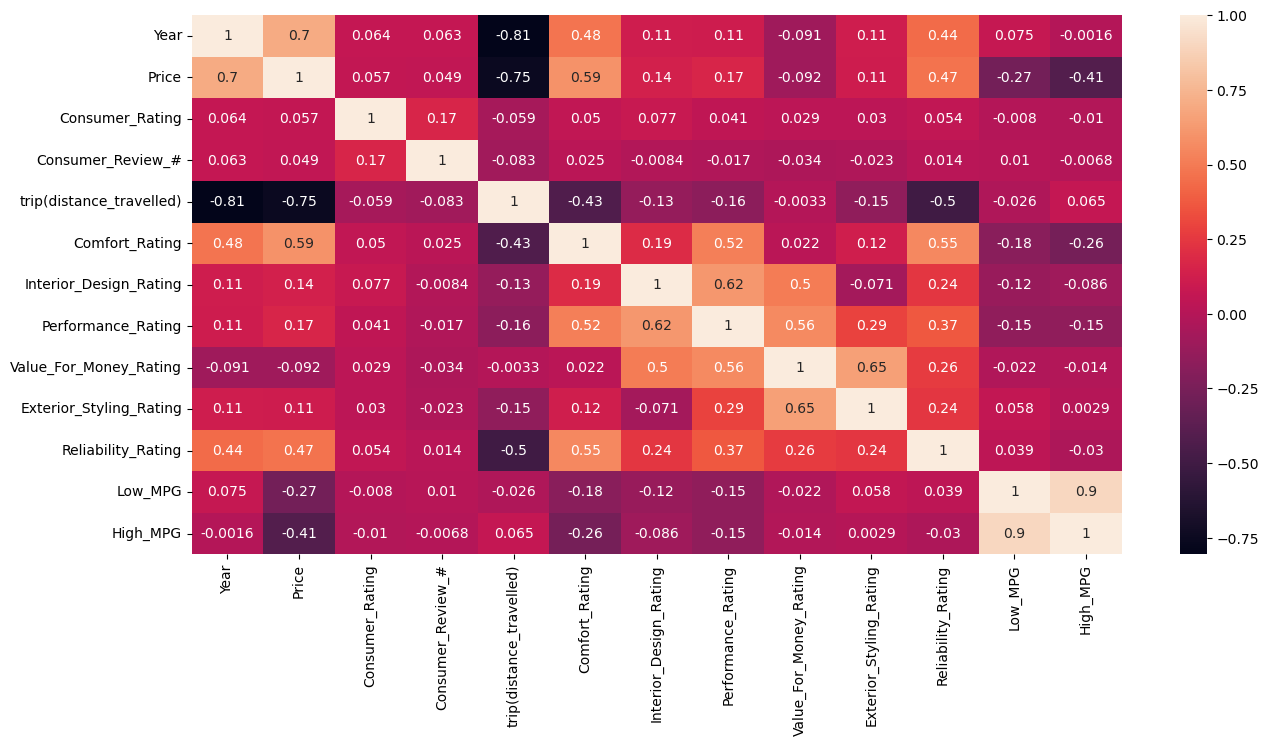

In [35]:
## Checking for correlation
cor_mat=df.corr(numeric_only=True)
fig = plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True)

**Take away**
- trip(distance travelled) is negatively correlated to Year and Price which can be inferred as the distance travelled of the old vehicles are more and also the price of the old vehicles is less which has more trip value.
- Price and Year are positively correlated as the price of new vehicles is more
- Low_MPG and High_MPG are positively correlated as observed that both are dervied from the same column
- All other features are independent to each other

## **Insights**

1) Black and gray cars are most sold car Interior_Color

2) Most cars sold are at the price range of 25,000 to 40,000 dollors

3) There is a huge increase in sales after the Year 2021

4) Consumer rating mostly lies from 4 to 5 which indicates very good customer satisfaction

5) All Ratings including consumer, comfort, reliablity and value for money mostly lies between 4 to 5

**Model Analysis**

In [36]:
df['Model'].value_counts()

Others                         353
XI-B EX-L                      268
P1 Sport                       228
P1 EX-L                        204
FA_3 Sport 1.5T                195
                              ... 
FA_3 LX 1.5T                    22
P1 EX-L 7-Passenger             22
F1 Si                           17
FA_3 Hybrid EX-L                16
Port Plug-In Hybrid Touring     16
Name: Model, Length: 61, dtype: int64

In [37]:
df1 = df.copy()
# Split the "Model" column by spaces and take the first word
df1['First_Word'] = df1['Model'].str.split().str[0]

# Count the occurrences of each first word
first_word_counts = df1['First_Word'].value_counts()

first_word_counts

P1        1088
XI-B       793
FA_3       628
F1         587
Oddie      442
GoPlus     425
Q8         365
Others     353
Excite     223
A3          79
Port        16
Name: First_Word, dtype: int64

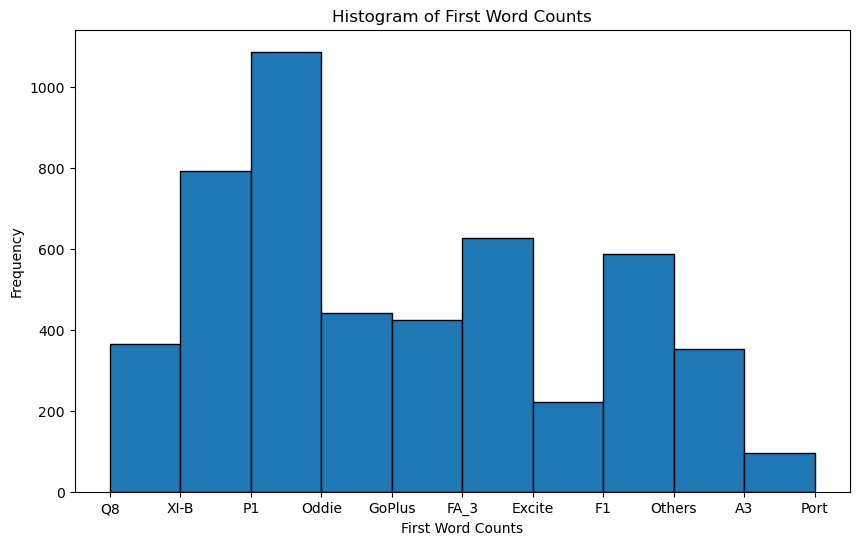

In [39]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(df1['First_Word'], bins=10, edgecolor='black')
plt.xlabel('First Word Counts')
plt.ylabel('Frequency')
plt.title('Histogram of First Word Counts')
plt.show()

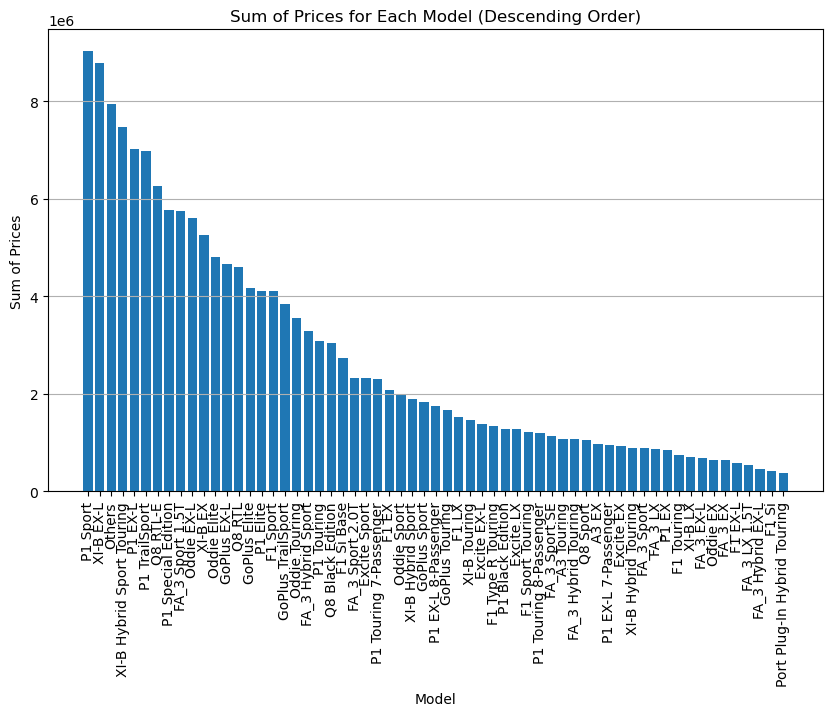

In [44]:
model_price_sum = df1.groupby('Model')['Price'].sum()

#Most Revenue earning Model
# Sort the sum of prices in descending order
sorted_model_price_sum = model_price_sum.sort_values(ascending=False)

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.bar(sorted_model_price_sum.index, sorted_model_price_sum)

plt.xlabel('Model')
plt.ylabel('Sum of Prices')
plt.title('Sum of Prices for Each Model (Descending Order)')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()